In [1]:
import networkx as nx
nx.__version__

'2.5'

The shortest weighted path from vertex v1 to vertex v11:  [1, 2, 5, 6, 3, 7, 10, 9, 11]
The shortest weighted path length from vertex v1 to vertex v11:  13


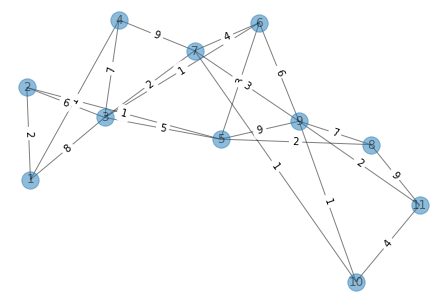

In [2]:
import matplotlib.pyplot as plt 
import networkx as nx  

# The shortest-circuit problem for undirected graphs（司守奎，数学建模算法与应用，P43，例4.3）
G2 = nx.Graph()  
G2.add_weighted_edges_from([(1,2,2),(1,3,8),(1,4,1),
                            (2,3,6),(2,5,1),
                            (3,4,7),(3,5,5),(3,6,1),(3,7,2),
                            (4,7,9),
                            (5,6,3),(5,8,2),(5,9,9),
                            (6,7,4),(6,9,6),
                            (7,9,3),(7,10,1),
                            (8,9,7),(8,11,9),
                            (9,10,1),(9,11,2),
                            (10,11,4)]) 

minWPath_v1_v11 = nx.dijkstra_path(G2, source=1, target=11)  
print("The shortest weighted path from vertex v1 to vertex v11: ", minWPath_v1_v11)

lMinWPath_v1_v11 = nx.dijkstra_path_length(G2, source=1, target=11)  
print("The shortest weighted path length from vertex v1 to vertex v11: ", lMinWPath_v1_v11)

pos = nx.spring_layout(G2)  
nx.draw(G2, pos, with_labels=True, alpha=0.5)
labels = nx.get_edge_attributes(G2,'weight')
nx.draw_networkx_edge_labels(G2, pos, edge_labels = labels)
plt.show()


The shortest path from vertex 0 to 3 is：[0, 3]，The shortest path length is：1
The shortest weighted path from vertex 0 to 3 is：[0, 4, 3]，The shortest weighted path length is：35
City 0 to City 1 The route with the lowest airfare is: [0, 5, 1] and the sum of the fares is: 35
City 0 to City 2 The route with the lowest airfare is: [0, 4, 2] and the sum of the fares is: 45
City 0 to City 3 The route with the lowest airfare is: [0, 5, 3] and the sum of the fares is: 35
City 0 to City 4 The route with the lowest airfare is: [0, 4] and the sum of the fares is: 25
City 0 to City 5 The route with the lowest airfare is: [0, 5] and the sum of the fares is: 10


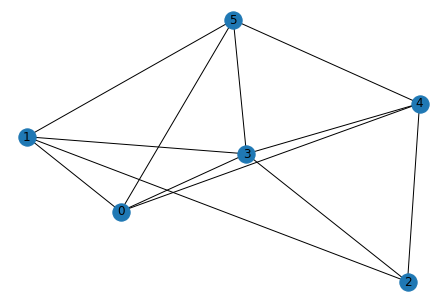

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx  

# Inter-city airfare issues（司守奎，数学建模算法与应用，P41，例4.1）
dfAdj = pd.DataFrame([[0, 50, 0, 40, 25, 10],  
                      [50, 0, 15, 20, 0, 25],
                      [0, 15, 0, 10, 20, 0],
                      [40, 20, 10, 0, 10, 25],
                      [25, 0, 20, 10, 0 ,55],
                      [10, 25, 0, 25, 55, 0]])
G1 = nx.from_pandas_adjacency(dfAdj)  # Create a NetworkX graph from the pandas vertex adjacency matrix

minPath03 = nx.shortest_path(G1, source=0, target=3) 
lMinPath03 = nx.shortest_path_length(G1, source=0, target=3) 
print("The shortest path from vertex 0 to 3 is：{}，The shortest path length is：{}".format(minPath03, lMinPath03))

minWPath03 = nx.bellman_ford_path(G1, source=0, target=3)  

lMinWPath03 = nx.bellman_ford_path_length(G1, source=0, target=3)  
print("The shortest weighted path from vertex 0 to 3 is：{}，The shortest weighted path length is：{}".format(minWPath03, lMinWPath03))

for i in range(1,6):
    minWPath0 = nx.dijkstra_path(G1, source=0, target=i)  
    lMinPath0 = nx.dijkstra_path_length(G1, source=0, target=i)  
    print("City 0 to City {} The route with the lowest airfare is: {} and the sum of the fares is: {}".format(i, minWPath0, lMinPath0))

nx.draw(G1, with_labels=True)
plt.show()


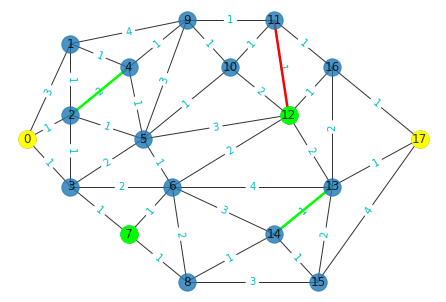

In [4]:
import matplotlib.pyplot as plt
import networkx as nx  

# Optimal path analysis for ants（西安邮电大学第12届数学建模竞赛B题）

gAnt = nx.Graph()  
gAnt.add_weighted_edges_from([(0,1,3),(0,2,1),(0,3,1),
                            (1,2,1),(1,4,1),(1,9,4),
                            (2,3,1),(2,4,2),(2,5,1),
                            (3,5,2),(3,6,2),(3,7,1),
                            (4,5,1),(4,9,1),
                            (5,6,1),(5,9,3),(5,10,1),(5,12,3),
                            (6,7,1),(6,8,2),(6,12,2),(6,13,4),(6,14,3),
                            (7,8,1),
                            (8,14,1),(8,15,3),
                            (9,10,1),(9,11,1),
                            (10,11,1),(10,12,2),
                            (11,12,1),(11,16,1),
                            (12,13,2),(12,16,1),
                            (13,14,1),(13,15,2),(13,16,2),(13,17,1),
                            (14,15,1),
                            (15,17,4),
                            (16,17,1)])  

pos={0:(1,8),1:(4,12),2:(4,9),3:(4,6),4:(8,11),5:(9,8), 
     6:(11,6),7:(8,4),8:(12,2),9:(12,13),10:(15,11),11:(18,13),
     12:(19,9),13:(22,6),14:(18,4),15:(21,2),16:(22,11),17:(28,8)}
nx.draw(gAnt, pos, with_labels=True, alpha=0.8)
labels = nx.get_edge_attributes(gAnt,'weight')
nx.draw_networkx_edge_labels(gAnt,pos,edge_labels=labels, font_color='c')
nx.draw_networkx_nodes(gAnt,pos,nodelist=[0,17],node_color='yellow')  
nx.draw_networkx_nodes(gAnt,pos,nodelist=[7,12],node_color='lime') 
nx.draw_networkx_edges(gAnt,pos,edgelist=[(2,4),(13,14)],edge_color='lime',width=2.5) 
nx.draw_networkx_edges(gAnt,pos,edgelist=[(11,12)],edge_color='r',width=2.5)  
plt.show()
